In [1]:
import numpy as np 
from utils import *
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from principal_RBM_alpha import *
from principal_DBN_alpha import *
from principal_DNN_MNIST import *

# Etude préliminaire (Binary AlphaDigit)

## Charger la data

In [47]:
file_path = "data//binaryalphadigs.mat"  # Remplacez par le chemin complet de votre fichier
data = scipy.io.loadmat(file_path)
all_labels = [str(data['classlabels'].reshape(36,)[i][0]) for i in range(data['classlabels'].shape[1])]
all_labels_num = convert_labels_to_numeric(all_labels)
labels = ['A']
labels_num = convert_labels_to_numeric(labels)

In [26]:
print(all_labels)
print(convert_labels_to_numeric(all_labels))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


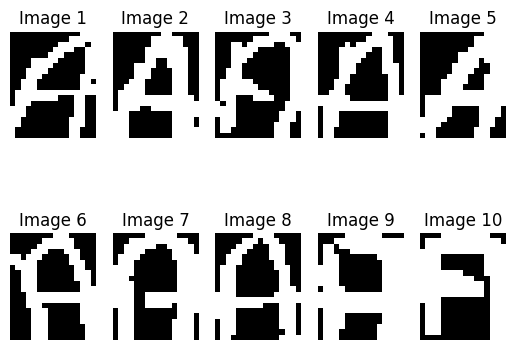

In [48]:
size_img = (20, 16)
X = lire_alpha_digit(data, labels_num)
indices  = np.random.choice(X.shape[0], size=10, replace=False)
display_images(X[indices], size_img)

## RBM sur Binary AlphaDigits 

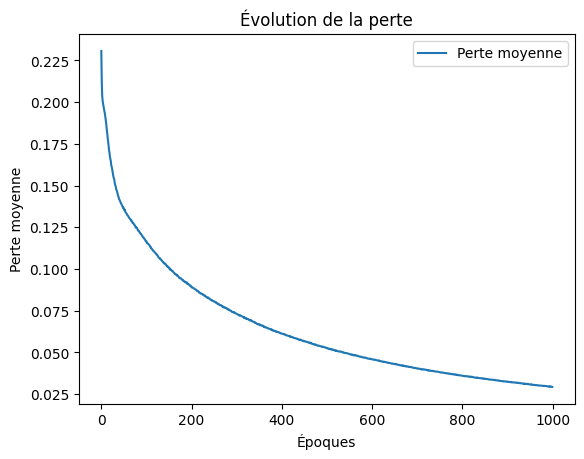

In [36]:
# Initialisation du RBM
rbm = RBM(n_visible=320, n_hidden=64)
# Entraînement du RBM
rbm.train(X, epochs=1000, batch_size=10, learning_rate=0.01)

Génération de caractères
5


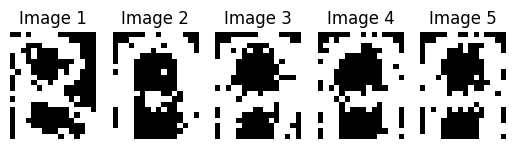

In [41]:
print("Génération de caractères")
n_images = 5
generated_images = rbm.generer_donnees(n_iter=5000, n_images=n_images)

# Afficher les images générées
display_images(generated_images, size_img)

print(len(generated_images))

## DBN sur Binary AlphaDigits 

Entraînement du DBN
Training RBM with 320 visible and 128 hidden units


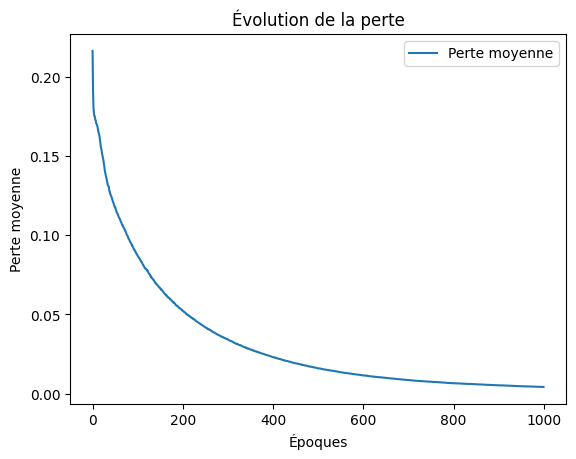

Training RBM with 128 visible and 64 hidden units


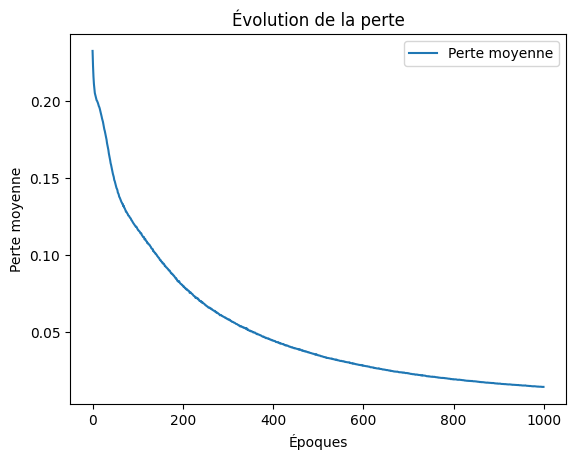

In [51]:
# Initialiser la DBN
layer_sizes = [320, 128, 64]  # 320 = 20*16 pixels d'entrée, couches cachées de 128 et 64
dbn = DBN_alpha(layer_sizes)

# Entraîner la DBN
print("Entraînement du DBN")
dbn.train_DBN(X, epochs=1000, batch_size=10, learning_rate=0.01)

Génération de caractères


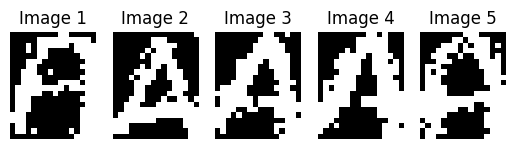

In [52]:
print("Génération de caractères")
n_images = 5
generated_images = dbn.generate_multiple_images(n_iter=500, n_images=n_images)

# Afficher les images générées
display_images(generated_images, size_img)

# DNN & Mnist

In [2]:
# Charger le dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Binarisation des images (0 ou 1)
x_train = (x_train > 127).astype(np.float32)
x_test = (x_test > 127).astype(np.float32)

# Reshaper les images en n_data, n_entree
n_entree = 28 * 28
x_train = x_train.reshape(x_train.shape[0], n_entree)
x_test = x_test.reshape(x_test.shape[0], n_entree)

# Afficher les dimensions des datasets
print("Dimensions des données :")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

# Afficher le type des x_train et x_test et y_train et y_test
print("Type des données :")
print(f"x_train: {type(x_train)}, y_train: {type(y_train)}")
print(f"x_test: {type(x_test)}, y_test: {type(y_test)}")

Dimensions des données :
x_train: (60000, 784), y_train: (60000,)
x_test: (10000, 784), y_test: (10000,)
Type des données :
x_train: <class 'numpy.ndarray'>, y_train: <class 'numpy.ndarray'>
x_test: <class 'numpy.ndarray'>, y_test: <class 'numpy.ndarray'>


In [5]:
selected_indices_list = select_and_shuffle_indices(y_train, nb_indices=600) # pour avoir nb_indices de chaque classe
x_train_ = x_train[selected_indices_list]
y_train_ = y_train[selected_indices_list]

In [9]:
# # compter le nombre de valeurs unique dans y_train_ et leurs occurences
# print("Nombre de valeurs uniques dans y_train_")
# unique, counts = np.unique(y_train_, return_counts=True)
# print(dict(zip(unique, counts)))

In [10]:
# charger un dnn
layer_sizes = [784, 200, 200, 10]
dnn_pretrain = DNN(layer_sizes)
dnn_random = DNN(layer_sizes)

Training RBM with 784 visible and 200 hidden units
epoch 1/10 - Perte moyenne : 0.039821134807763725
epoch 2/10 - Perte moyenne : 0.02677989636197978
epoch 3/10 - Perte moyenne : 0.023109713485501816
epoch 4/10 - Perte moyenne : 0.020967019766687103
epoch 5/10 - Perte moyenne : 0.0194454421519219
epoch 6/10 - Perte moyenne : 0.018426644819236816
epoch 7/10 - Perte moyenne : 0.017521463393028822
epoch 8/10 - Perte moyenne : 0.016782495443691158
epoch 9/10 - Perte moyenne : 0.01613254473615375
epoch 10/10 - Perte moyenne : 0.01560287176202054


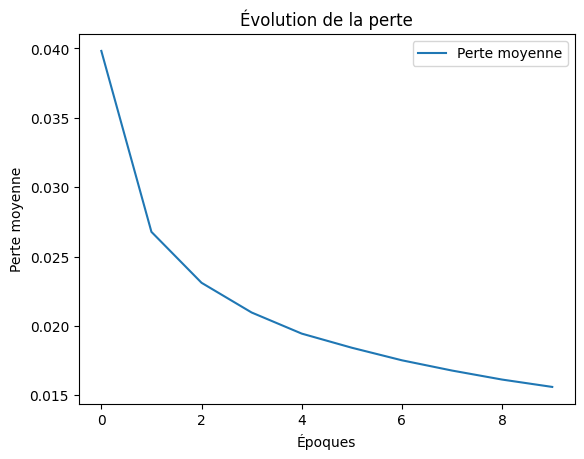

Training RBM with 200 visible and 200 hidden units
epoch 1/10 - Perte moyenne : 0.06656055356235878
epoch 2/10 - Perte moyenne : 0.03815090490890505
epoch 3/10 - Perte moyenne : 0.03062142317956458
epoch 4/10 - Perte moyenne : 0.02674047721867631
epoch 5/10 - Perte moyenne : 0.024260508903414246
epoch 6/10 - Perte moyenne : 0.022663542235651327
epoch 7/10 - Perte moyenne : 0.02135373947553134
epoch 8/10 - Perte moyenne : 0.02042357958028232
epoch 9/10 - Perte moyenne : 0.01973476487247238
epoch 10/10 - Perte moyenne : 0.019169470616281725


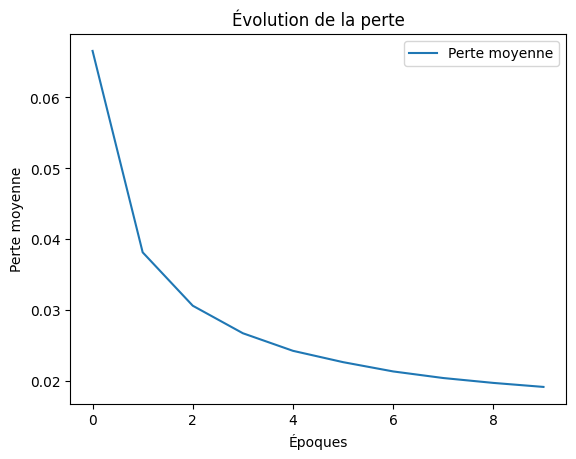

In [11]:
# pretrain le dnn
dnn_pretrain.pretrain_DNN(x_train_, nb_iterations=10, batch_size=10, learning_rate=0.1, verbose=True)

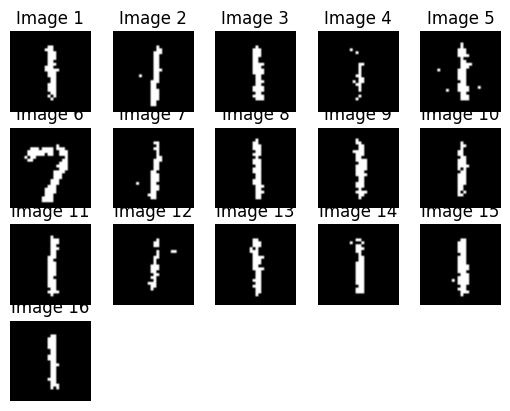

In [23]:
size_img = (28, 28)
generated_images = dnn_pretrain.dbn.generate_multiple_images(n_iter=500, n_images=16)
display_images(generated_images, size_img)

Époque 1/5, Perte moyenne : 0.5613
Époque 2/5, Perte moyenne : 0.2809
Époque 3/5, Perte moyenne : 0.2279
Époque 4/5, Perte moyenne : 0.1958
Époque 5/5, Perte moyenne : 0.1733


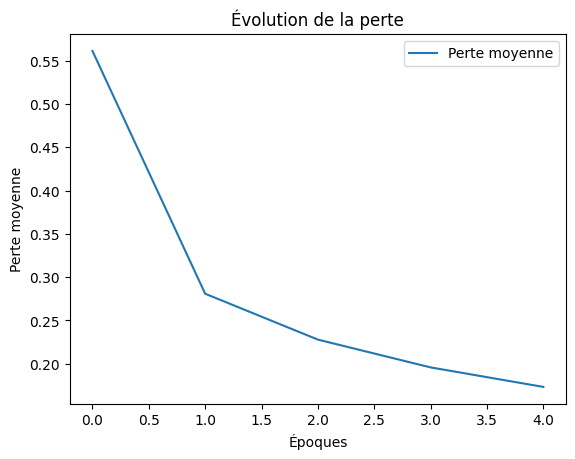

In [24]:
# entrainement supervisée du dnn pretrain
dnn_pretrain.retropropagation(epochs= 5, learning_rate = 0.1, batch_size = 10, donnees_entree=x_train_, labels=y_train_, verbose=True)

Époque 1/5, Perte moyenne : 1.6229
Époque 2/5, Perte moyenne : 0.5893
Époque 3/5, Perte moyenne : 0.4128
Époque 4/5, Perte moyenne : 0.3529
Époque 5/5, Perte moyenne : 0.3058


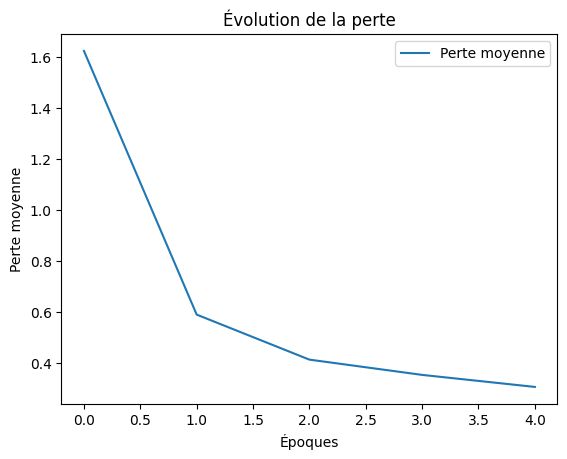

In [25]:
# entrainement supervisée du dnn random
dnn_random.retropropagation(epochs= 5, learning_rate = 0.1, batch_size = 10, donnees_entree=x_train_, labels=y_train_, verbose=True)

#### Construction des graphiques pour le rapport 

In [27]:
# Acc_pretrain = {}
# Acc_random = {}

In [26]:
# # Evaluer le modèle
# accuracy_pretrain = dnn_pretrain.test_DNN(x_test, y_test)
# print(f"Précision du modèle pretrain: {accuracy_pretrain}")

# accuracy_random = dnn_random.test_DNN(x_test, y_test)
# print(f"Précision du modèle random: {accuracy_random}")

# Acc_pretrain[nb_indices*10] = accuracy_pretrain
# Acc_random[nb_indices*10] = accuracy_random

# Acc_pretrain = dict(sorted(Acc_pretrain.items()))
# Acc_random = dict(sorted(Acc_random.items()))


In [28]:
# #plot the results
# plt.figure()
# plt.plot(list(Acc_pretrain.keys()), list(Acc_pretrain.values()), label='Pretrain')
# plt.plot(list(Acc_random.keys()), list(Acc_random.values()), label='Random')
# plt.xlabel('volume of training data')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs volume of training data')
# plt.legend()
# plt.show()